# Tensorflow Datasets and Sequential Model

In [7]:
import os
import glob
from itertools import chain
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout
import cv2

In [8]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#  First way:

model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(170, activation='relu'),
    Dropout(0.1),
    Dense(90, activation='relu'),
    Dense(48, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

#  Second way:

# model = tf.keras.models.Sequential()
# model.add(Flatten(input_shape=(28,28))))
# model.add(Dense(170, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(90, activation='relu'))
# model.add(Dense(48, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))

In [10]:
x_val = x_test[:500]
y_val = y_test[:500]

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2088 - accuracy: 0.9448 - val_loss: 0.1171 - val_accuracy: 0.9680
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1786 - accuracy: 0.9526 - val_loss: 0.1203 - val_accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1672 - accuracy: 0.9550 - val_loss: 0.0692 - val_accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1545 - accuracy: 0.9587 - val_loss: 0.1368 - val_accuracy: 0.9700
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1373 - accuracy: 0.9624 - val_loss: 0.1243 - val_accuracy: 0.9680


In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'val loss')

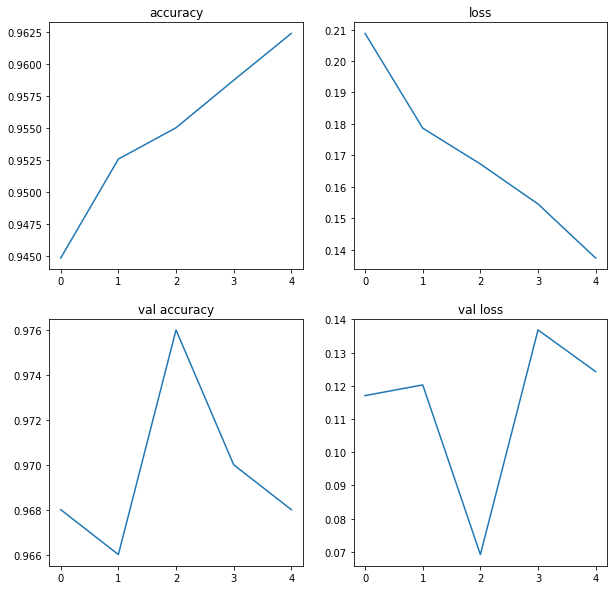

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0][0].plot(history.history['accuracy'])
ax[0][0].set_title('accuracy')
ax[0][1].plot(history.history['loss'])
ax[0][1].set_title('loss')
ax[1][0].plot(history.history['val_accuracy'])
ax[1][0].set_title('val accuracy')
ax[1][1].plot(history.history['val_loss'])
ax[1][1].set_title('val loss')

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 662us/step - loss: 0.1356 - accuracy: 0.9686


[0.13556140661239624, 0.9685999751091003]

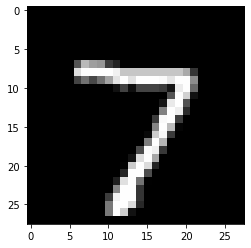

In [20]:
plt.imshow(x_test[0], cmap='gray')

# Using other datasets

## Connecting G-drive to Colab

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preparing dataset file

In [26]:
!mkdir /content/drive/MyDrive/BMWcars

In [27]:
# http://ai.stanford.edu/~jkrause/car196/bmw10_release.tgz

!tar -xf "/content/drive/MyDrive/bmw10_release.tgz" -C "/content/drive/MyDrive/BMWcars"

In [28]:
source = '/content/drive/MyDrive/BMWcars/bmw10_ims'

### Preparing dataset

In [29]:
sources = os.listdir(source)

In [31]:
print(type(sources))
print(sources)

<class 'list'>
['10', '3', '4', '7', '5', '2', '8', '11', '6', '1']


In [42]:
path = sources[1]
files = np.array('start')
print(source + '/' + path)
files = glob.glob(os.path.join((source + '/' + path), '*.jpg'))
files

/content/drive/MyDrive/BMWcars/bmw10_ims/3


['/content/drive/MyDrive/BMWcars/bmw10_ims/3/7442015152_7660dc32e9_o.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/3/150199659.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/3/150198133.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/3/150201292.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/3/150200088.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/3/150198721.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/3/150198209.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/3/150201563.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/3/7894238946_20405da846_o.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/3/150201648.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/3/150199807.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/3/7894240418_7d3f06023f_o.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/3/150200953.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/3/150198942.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/3/150198310.jpg',
 '/content/drive/MyDrive/BMWcars/bmw10_ims/

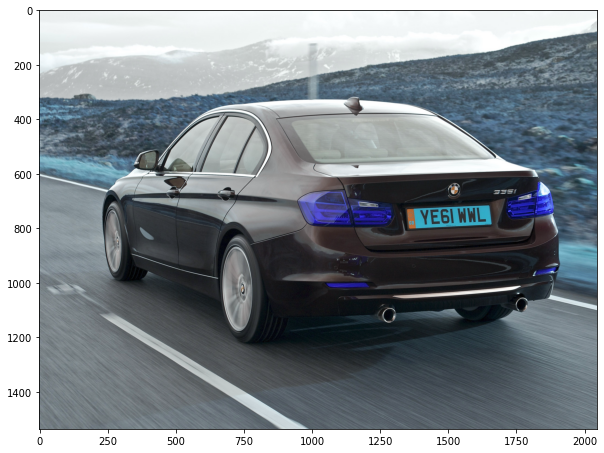

In [46]:
bgrimage = cv2.imread(files[3])
plt.figure(figsize=(10,10))
plt.imshow(bgrimage)
# cv2.imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

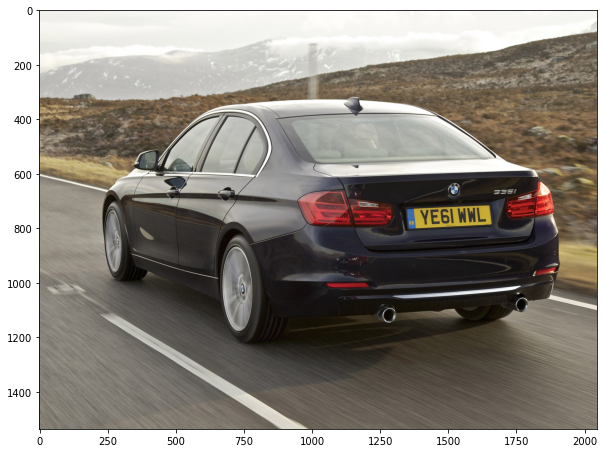

In [47]:
rgbimage = cv2.cvtColor(bgrimage, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(rgbimage)

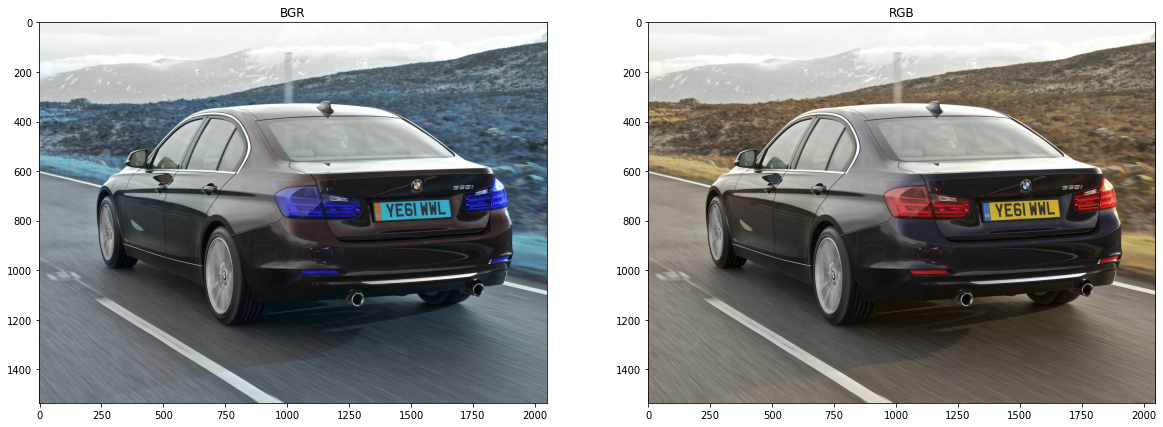

In [49]:
fig, ax = plt.subplots(1,2, figsize = (20,20))
ax[0].set_title('BGR')
ax[0].imshow(bgrimage)
ax[1].set_title('RGB')
ax[1].imshow(rgbimage)